In [40]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
import scipy.stats as sts
import datetime as dt

In [2]:
# Import csv data

file_path = "Resources\Delays.csv"

delays_df = pd.read_csv(file_path, header=0)
delays_df.head()

,Date,FullShiftSuffix,DelayTimeMins,Eqmt,Reason,OperatorName
0,5/31/2016,Night Shift,0.033333,T380,LUBE CENTER,Orozco Matthew
1,6/1/2016,Day Shift,8.333333,T325,FIELD SERVICE,Lopez David
2,6/1/2016,Day Shift,11.100000,T317,FIELD SERVICE,FOSCA DAVID
3,6/1/2016,Day Shift,31.616666,T315,FIELD SERVICE,CLARK JOHN
4,6/1/2016,Day Shift,0.766666,T327,GENERAL OPERATIONS,Estep Frankie


In [3]:
# Import truck hour excell

file_path = "Resources\ProductionMetrics_x.xls"

truck_hour_df = pd.read_excel(file_path)
truck_hour_df.head()

,Day,Shift,Ore Tons,Waste Tons,Stockpile Tons,Total Tons,Eq. Trucks,Tons Per Ready Hour,Tons Per Ready+Delay Hour,Ton-Mile per Ready Hour,Tons Per Eq. Truck,Truck Availability,Trucks Delayed,Shift EFH
0,2017-01-01,Night,32550.0,45880.0,0.0,78430.0,14.785399,493.447184,448.114544,2655.863903,5304.557557,0.950498,0.091869,5.382266
1,2017-01-01,Day,18600.0,57040.0,0.0,75640.0,12.174056,577.973271,503.253654,2494.537126,6213.212753,0.838402,0.129279,4.316008
2,2017-01-02,Night,40300.0,28210.0,0.0,68510.0,14.337518,444.499740,402.642768,2260.958021,4778.372379,0.826545,0.094166,5.086523
3,2017-01-02,Day,35960.0,35960.0,0.0,71920.0,13.148319,508.827946,441.839166,2857.108990,5469.900753,0.815906,0.131653,5.615079
4,2017-01-03,Night,26970.0,42470.0,0.0,69440.0,14.580826,443.015693,386.200356,2370.413870,4762.418809,0.922603,0.128247,5.350632


In [4]:
truck_hour_df.columns

Index(['Day', 'Shift', 'Ore Tons', 'Waste Tons', 'Stockpile Tons',
       'Total Tons', 'Eq. Trucks', 'Tons Per Ready Hour',
       'Tons Per Ready+Delay Hour', 'Ton-Mile per Ready Hour',
       'Tons Per Eq. Truck ', 'Truck Availability', 'Trucks Delayed',
       'Shift EFH'],
      dtype='object')

In [5]:
# new Eq Truck Callc to new df
run_time_df=truck_hour_df.drop(columns = ['Ore Tons', 'Waste Tons', 'Stockpile Tons',
       'Total Tons','Tons Per Ready Hour',
       'Tons Per Ready+Delay Hour', 'Ton-Mile per Ready Hour',
       'Tons Per Eq. Truck ', 'Truck Availability', 'Trucks Delayed',
       'Shift EFH'], axis=1)
run_time_df.head()

,Day,Shift,Eq. Trucks
0,2017-01-01,Night,14.785399
1,2017-01-01,Day,12.174056
2,2017-01-02,Night,14.337518
3,2017-01-02,Day,13.148319
4,2017-01-03,Night,14.580826


In [6]:
# Change Eq. Trucks to hours
run_time_df['hours'] = run_time_df['Eq. Trucks'] * 12
run_time_df.drop(columns='Eq. Trucks', axis=1, inplace=True)

In [7]:
# Change Shift 

delays_df.loc[delays_df["FullShiftSuffix"]=="Night Shift","FullShiftSuffix"]="Night"
delays_df.loc[delays_df["FullShiftSuffix"]=="Day Shift","FullShiftSuffix"]="Day"

delays_df

,Date,FullShiftSuffix,DelayTimeMins,Eqmt,Reason,OperatorName
0,5/31/2016,Night,0.033333,T380,LUBE CENTER,Orozco Matthew
1,6/1/2016,Day,8.333333,T325,FIELD SERVICE,Lopez David
2,6/1/2016,Day,11.100000,T317,FIELD SERVICE,FOSCA DAVID
3,6/1/2016,Day,31.616666,T315,FIELD SERVICE,CLARK JOHN
4,6/1/2016,Day,0.766666,T327,GENERAL OPERATIONS,Estep Frankie
...,...,...,...,...,...,...
288500,5/3/2022,Day,5.133333,T391,STEERING/BRAKE TEST,Armstrong Andrew
288501,5/3/2022,Day,5.150000,T327,STEERING/BRAKE TEST,Greg Benavides
288502,5/3/2022,Day,5.933333,T393,STEERING/BRAKE TEST,BEGEMAN CHAD
288503,5/3/2022,Day,6.883333,T321,STEERING/BRAKE TEST,Zazueta Luis


In [8]:
# Change Date to Date format
delays_df["Date"]= pd.to_datetime(delays_df["Date"])

delays_df.head()

,Date,FullShiftSuffix,DelayTimeMins,Eqmt,Reason,OperatorName
0,2016-05-31,Night,0.033333,T380,LUBE CENTER,Orozco Matthew
1,2016-06-01,Day,8.333333,T325,FIELD SERVICE,Lopez David
2,2016-06-01,Day,11.100000,T317,FIELD SERVICE,FOSCA DAVID
3,2016-06-01,Day,31.616666,T315,FIELD SERVICE,CLARK JOHN
4,2016-06-01,Day,0.766666,T327,GENERAL OPERATIONS,Estep Frankie


In [9]:
# Check Equipment Category
delays_df["Eqmt"].unique()

array(['T380', 'T325', 'T317', 'T315', 'T327', 'T375', 'T326', 'T318',
       'T323', 'T320', 'T316', 'T321', 'T328', 'T322', 'S516', 'L530',
       'L531', 'T324', 'S517', 'S518', 'S520', 'T377', 'T319', 'T390',
       'T394', 'S515', 'L548', 'T391', 'T399', 'T395', 'T398', 'T329',
       'T393', 'L532'], dtype=object)

In [10]:
#  Drop Op name
delays_df = delays_df.drop(columns= "OperatorName", axis = 1)
delays_df.head()

,Date,FullShiftSuffix,DelayTimeMins,Eqmt,Reason
0,2016-05-31,Night,0.033333,T380,LUBE CENTER
1,2016-06-01,Day,8.333333,T325,FIELD SERVICE
2,2016-06-01,Day,11.100000,T317,FIELD SERVICE
3,2016-06-01,Day,31.616666,T315,FIELD SERVICE
4,2016-06-01,Day,0.766666,T327,GENERAL OPERATIONS


In [11]:
# Create Truck_df and Loading_df

loading = ['S516', 'L530','L531','S517', 'S518', 'S520','S515', 'L548', 'L532']


Truck_df = delays_df[~delays_df["Eqmt"].isin(loading)]
loading_df = delays_df[delays_df["Eqmt"].isin(loading)]   

# Check success of removing loading
print(Truck_df["Eqmt"].unique())
print(loading_df["Eqmt"].unique())


['T380' 'T325' 'T317' 'T315' 'T327' 'T375' 'T326' 'T318' 'T323' 'T320'
 'T316' 'T321' 'T328' 'T322' 'T324' 'T377' 'T319' 'T390' 'T394' 'T391'
 'T399' 'T395' 'T398' 'T329' 'T393']
['S516' 'L530' 'L531' 'S517' 'S518' 'S520' 'S515' 'L548' 'L532']


In [12]:
# Drop Equipment Number
Truck_clean_df= Truck_df.drop(columns="Eqmt", axis=1)


In [13]:
Truck_clean_df

,Date,FullShiftSuffix,DelayTimeMins,Reason
0,2016-05-31,Night,0.033333,LUBE CENTER
1,2016-06-01,Day,8.333333,FIELD SERVICE
2,2016-06-01,Day,11.100000,FIELD SERVICE
3,2016-06-01,Day,31.616666,FIELD SERVICE
4,2016-06-01,Day,0.766666,GENERAL OPERATIONS
...,...,...,...,...
288500,2022-05-03,Day,5.133333,STEERING/BRAKE TEST
288501,2022-05-03,Day,5.150000,STEERING/BRAKE TEST
288502,2022-05-03,Day,5.933333,STEERING/BRAKE TEST
288503,2022-05-03,Day,6.883333,STEERING/BRAKE TEST


In [14]:
# # Groupby Date
run_time_day_df=run_time_df.groupby(run_time_df["Day"]).sum()


run_time_day_df.reset_index(inplace=True)
run_time_day_df

,Day,hours
0,2017-01-01,323.513460
1,2017-01-02,329.830044
2,2017-01-03,332.134548
3,2017-01-04,307.933920
4,2017-01-05,326.899200
...,...,...
1944,2022-04-29,371.221980
1945,2022-04-30,365.378568
1946,2022-05-01,316.624164
1947,2022-05-02,326.940744


In [15]:
# # Sort Data with groupby to get total delay by day

truck_delay_df = Truck_clean_df.groupby(['Date']).sum()

truck_delay_df.reset_index(inplace=True)
truck_delay_df

,Date,DelayTimeMins
0,2016-05-31,0.033333
1,2016-06-01,1524.083306
2,2016-06-02,1352.983315
3,2016-06-03,1580.116644
4,2016-06-04,1468.349980
...,...,...
2141,2022-04-29,3384.149950
2142,2022-04-30,3078.083280
2143,2022-05-01,3210.049949
2144,2022-05-02,2582.933297


In [16]:
# Merge inner truck_delay_df and run_time_df

delay_merge_df = pd.merge(truck_delay_df,run_time_day_df, how="inner",
                          left_on = ["Date"], right_on = ["Day"])

delay_merge_df.drop(columns = ['Day'], axis=1, inplace=True)
delay_merge_df['delay_per_truck']= ((delay_merge_df['DelayTimeMins']/60)/delay_merge_df['hours'])*24
delay_merge_df.head()

,Date,DelayTimeMins,hours,delay_per_truck
0,2017-01-02,2018.399972,329.830044,2.447806
1,2017-01-03,2235.716620,332.134548,2.692543
2,2017-01-04,2171.049965,307.933920,2.820150
3,2017-01-05,1417.283312,326.899200,1.734214
4,2017-01-06,1611.783310,326.416104,1.975127


In [57]:
# Check delays/day/year

delay_merge_df['year']= delay_merge_df["Date"].dt.year

year_delay = delay_merge_df.groupby(["year"]).mean()

year_delay

,DelayTimeMins,hours,delay_per_truck
year,,,
2017,1936.718742,346.922284,2.262927
2018,2263.531108,341.173695,2.709670
2019,1862.024284,279.067293,2.720855
2020,2233.250240,306.417440,2.937090
2021,2758.411007,338.330839,3.297820
2022,3077.877594,342.224205,3.603863


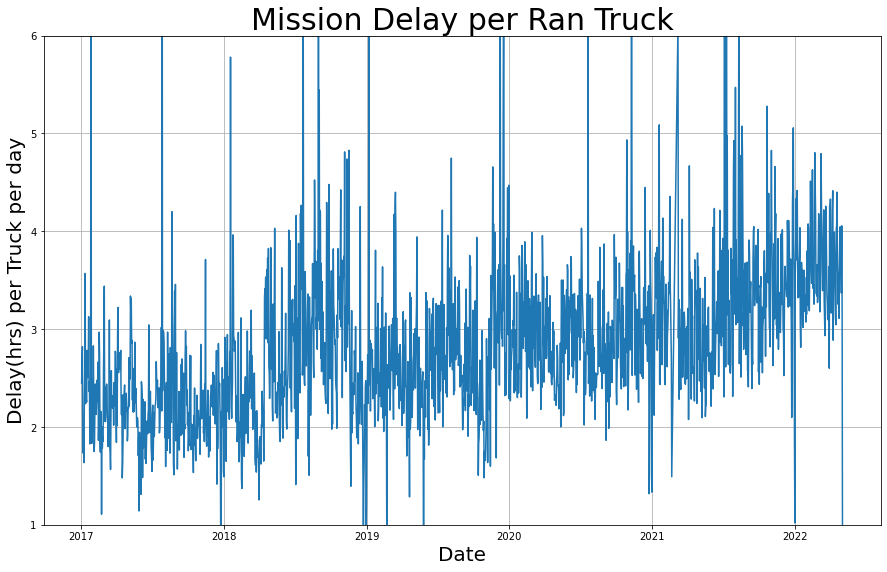

In [26]:
# Build line plot for Delay.

date = delay_merge_df['Date']
delay = delay_merge_df['delay_per_truck']

plt.subplots(figsize=(15, 9))
plt.plot(date, delay)
plt.title("Mission Delay per Ran Truck", fontsize=30)
plt.ylabel("Delay(hrs) per Truck per day", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylim([1,6])
plt.grid(True)

# Save the figure.
plt.savefig("images/Total_Delay_vs_Time.png")

In [23]:
# Statistics on Total Truck Delay hours

delay_merge_df["delay_per_truck"].describe()

count    1932.000000
mean        2.834168
std         0.823569
min         0.091382
25%         2.306575
50%         2.729182
75%         3.267391
max        12.731956
Name: delay_per_truck, dtype: float64

In [66]:
Truck_clean_df

,Date,FullShiftSuffix,DelayTimeMins,Reason
0,2016-05-31,Night,0.033333,LUBE CENTER
1,2016-06-01,Day,8.333333,FIELD SERVICE
2,2016-06-01,Day,11.100000,FIELD SERVICE
3,2016-06-01,Day,31.616666,FIELD SERVICE
4,2016-06-01,Day,0.766666,GENERAL OPERATIONS
...,...,...,...,...
288500,2022-05-03,Day,5.133333,STEERING/BRAKE TEST
288501,2022-05-03,Day,5.150000,STEERING/BRAKE TEST
288502,2022-05-03,Day,5.933333,STEERING/BRAKE TEST
288503,2022-05-03,Day,6.883333,STEERING/BRAKE TEST


In [69]:
# Merge Truck_clean_df with run_time_day to get Hrs/truck day/day

# Group Truck_clean_df by date and reason
truck_group_df = Truck_clean_df.groupby(['Date','Reason']).sum()
truck_group_df.reset_index(inplace=True)

# Merge truck hour to delay table
delay_reason_df = pd.merge(truck_group_df,run_time_day_df, how="inner", left_on = "Date", right_on = "Day")
delay_reason_df.head(40)

# Calculate delay/truck hour ran
delay_reason_df['delay_truck_day']= ((delay_reason_df['DelayTimeMins']/60)/(delay_reason_df['hours']))*24

reason_trk = delay_reason_df.drop(columns=['DelayTimeMins',"Day","hours"], axis=1)

reason_trk['year']= reason_trk['Date'].dt.year

reason_trk

,Date,Reason,delay_truck_day,year
0,2017-01-02,FIELD SERVICE,0.311716,2017
1,2017-01-02,GENERAL OPERATIONS,0.005336,2017
2,2017-01-02,LONG SHOVEL CLEANUP,0.026680,2017
3,2017-01-02,LUBE CENTER,0.446674,2017
4,2017-01-02,LUNCH,1.061759,2017
...,...,...,...,...
20236,2022-05-03,FIELD SERVICE,0.087633,2022
20237,2022-05-03,LUBE CENTER,0.125181,2022
20238,2022-05-03,OPERATOR BREAK,0.093743,2022
20239,2022-05-03,PRE-OP,0.251134,2022


In [108]:
delay_reason_year = reason_trk.groupby(['year','Reason']).sum()

delay_reason_year.reset_index(inplace=True)

year = reason_trk['year'].unique()
year_days = reason_trk['Date'].unique()

days = pd.DataFrame(year_days)

years_no = days[0].dt.year
check = years_no.value_counts()

check
for x in year:
    delay_reason_year.loc[(delay_reason_year["year"]==x),"delay_truck_day"]=delay_reason_year["delay_truck_day"]/check.get(x)

delay_reason_year.head()

,year,Reason,delay_truck_day
0,2017,BRIDGE/BOULDERS,0.000435
1,2017,DELAY FOR BLAST,0.002717
2,2017,FIELD SERVICE,0.049613
3,2017,FUEL/LUBE,0.002147
4,2017,GENERAL OPERATIONS,0.046269


In [115]:
# Change dataframe arrangemnet
reasons_df = delay_reason_year.pivot(index="year",columns="Reason",values="delay_truck_day")
reasons_df.fillna(0, inplace=True)

reasons_df.reset_index(inplace=True)
reasons_df

Reason,year,BRIDGE/BOULDERS,CR 1ST CLEANUP,DELAY FOR BLAST,DRILL BIT/STEEL CHANGE,FIELD SERVICE,FUEL/LUBE,GENERAL OPERATIONS,HOUSEKEEPING,LONG MUCK WATERING,...,SCALE STUDY,SEATBELT ALARM,SHIFT CHANGE,SHORT SHOVEL CLEANUP,SHOVEL MOVE,STEERING/BRAKE TEST,TRAMMING TO LOCATION,WAITING FOR CRUSHER,WAITING FOR SHOVELS,WEATHER
0,2017,0.000435,0.000000,0.002717,0.000000,0.049613,0.002147,0.046269,0.000569,0.000000,...,0.000000,0.000958,0.193121,0.003000,0.003713,0.011801,0.000000e+00,0.026096,0.034657,0.000575
1,2018,0.000083,0.000000,0.030877,0.000000,0.066824,0.000909,0.033057,0.000774,0.000000,...,0.000000,0.006243,0.130460,0.025986,0.013862,0.053079,0.000000e+00,0.076817,0.129830,0.015111
2,2019,0.000693,0.000312,0.043256,0.000000,0.052304,0.001486,0.053879,0.000426,0.000000,...,0.000771,0.005750,0.095817,0.009284,0.005470,0.031016,0.000000e+00,0.091802,0.130219,0.021501
3,2020,0.000953,0.000000,0.018713,0.000000,0.112999,0.002758,0.053253,0.000826,0.000000,...,0.000000,0.002817,0.162123,0.004856,0.001540,0.046221,4.141157e-07,0.046515,0.121631,0.006554
4,2021,0.000284,0.000000,0.004562,0.000019,0.138709,0.002248,0.035055,0.000569,0.000950,...,0.000000,0.003107,0.339496,0.004254,0.002375,0.067627,0.000000e+00,0.077662,0.125540,0.046496
5,2022,0.000000,0.000000,0.005152,0.000000,0.159184,0.001316,0.035530,0.005820,0.000176,...,0.000000,0.002821,0.001645,0.005688,0.003087,0.095446,0.000000e+00,0.080022,0.110920,0.000004


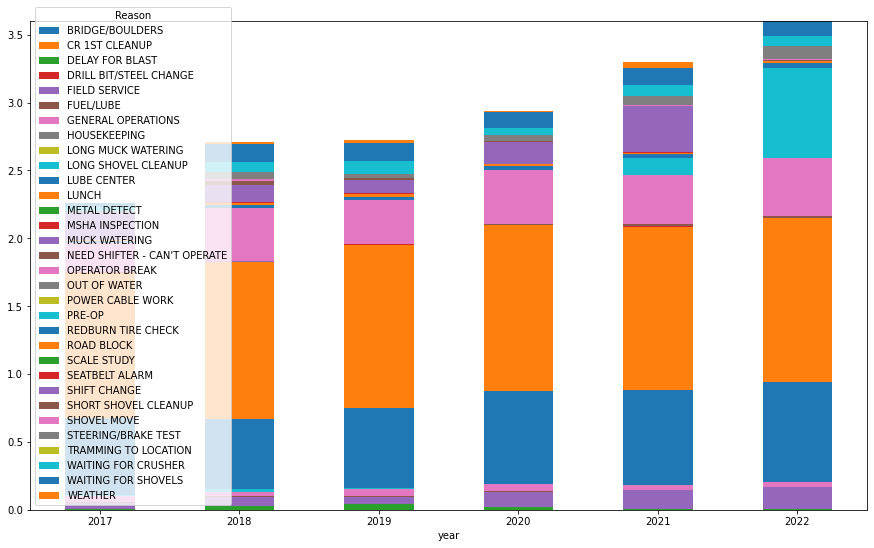

In [122]:

ax = reasons_df.plot.bar(x="year",rot=0, figsize=(15,9),stacked=True)

In [123]:
with pd.ExcelWriter("MSN_Delays.xlsx") as writer:

# Print Prodcution Sheets First
    reasons_df.to_excel(writer,sheet_name = 'Delays',index = False)